In [ ]:
!pip install torch

**Task 1**

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

X, _ = make_blobs(n_samples=500, centers=[[0, 0]], cluster_std=[1.0], random_state=42)

In [ ]:
num_projections = 5
projection_vectors = np.random.multivariate_normal([0, 0], np.eye(2), num_projections)

projection_vectors = projection_vectors / np.linalg.norm(projection_vectors, axis=1)[:, np.newaxis]

In [ ]:
projected_data = X.dot(projection_vectors.T)

In [ ]:
num_bins = 50
histograms = []
bin_edges_list = []

for i in range(num_projections):
    data_range = (projected_data[:, i].min() - 1, projected_data[:, i].max() + 1) # Use a larger interval

    hist, bin_edges = np.histogram(projected_data[:, i], bins=num_bins, range=data_range)
    histograms.append(hist)
    bin_edges_list.append(bin_edges)

print("Computed histograms (first projection):\n", histograms[0])
print("Bin edges (first projection):\n", bin_edges_list[0])

Computed histograms (first projection):
 [ 0  0  0  0  0  0  1  0  0  4  2  5  2  7  7 15  6 12 18 22 28 23 42 40
 46 29 17 40 27 24 22 11 15 11 10  3  4  2  0  1  3  0  0  1  0  0  0  0
  0  0]
Bin edges (first projection):
 [-4.07951557 -3.9130883  -3.74666103 -3.58023376 -3.41380648 -3.24737921
 -3.08095194 -2.91452466 -2.74809739 -2.58167012 -2.41524285 -2.24881557
 -2.0823883  -1.91596103 -1.74953375 -1.58310648 -1.41667921 -1.25025194
 -1.08382466 -0.91739739 -0.75097012 -0.58454284 -0.41811557 -0.2516883
 -0.08526103  0.08116625  0.24759352  0.41402079  0.58044807  0.74687534
  0.91330261  1.07972988  1.24615716  1.41258443  1.5790117   1.74543898
  1.91186625  2.07829352  2.24472079  2.41114807  2.57757534  2.74400261
  2.91042989  3.07685716  3.24328443  3.40971171  3.57613898  3.74256625
  3.90899352  4.0754208   4.24184807]


In [ ]:
probability_distributions = []

for hist in histograms:
    prob_dist = hist / hist.sum()
    probability_distributions.append(prob_dist)

print("Probability distribution (first projection):\n", probability_distributions[0])

Probability distribution (first projection):
 [0.    0.    0.    0.    0.    0.    0.002 0.    0.    0.008 0.004 0.01
 0.004 0.014 0.014 0.03  0.012 0.024 0.036 0.044 0.056 0.046 0.084 0.08
 0.092 0.058 0.034 0.08  0.054 0.048 0.044 0.022 0.03  0.022 0.02  0.006
 0.008 0.004 0.    0.002 0.006 0.    0.    0.002 0.    0.    0.    0.
 0.    0.   ]


In [ ]:
anomaly_scores = []

for data_point in X:
    point_anomaly_scores = []
    for i in range(num_projections):
        projected_point = data_point.dot(projection_vectors[i])

        bin_index = np.searchsorted(bin_edges_list[i], projected_point) - 1

        bin_index = max(0, min(bin_index, num_bins - 1))

        probability = probability_distributions[i][bin_index]
        point_anomaly_scores.append(probability)

    mean_probability = np.mean(point_anomaly_scores)
    anomaly_scores.append(mean_probability)

anomaly_scores = np.array(anomaly_scores)

print("First 10 anomaly scores:\n", anomaly_scores[:10])
print("Shape of anomaly scores:", anomaly_scores.shape)

First 10 anomaly scores:
 [0.0596 0.062  0.0476 0.0396 0.0488 0.0696 0.0448 0.0484 0.03   0.0368]
Shape of anomaly scores: (500,)


In [ ]:
X_test = np.random.uniform(low=-3, high=3, size=(500, 2))

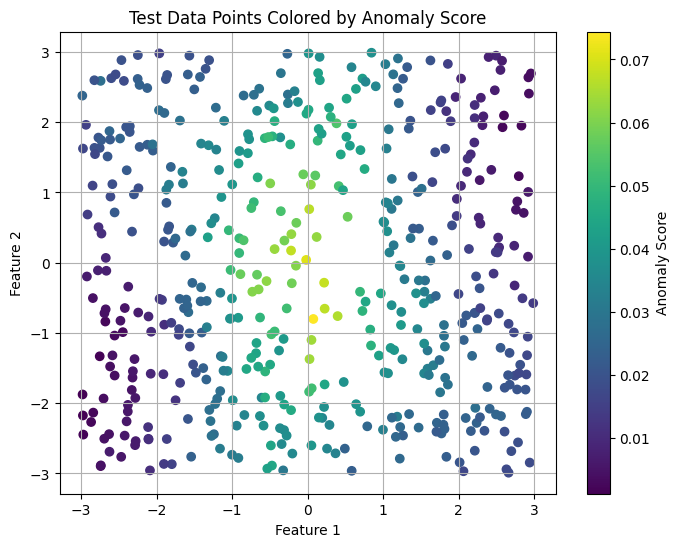

In [ ]:
import matplotlib.pyplot as plt

test_anomaly_scores = []

for data_point in X_test:
    point_anomaly_scores = []
    for i in range(num_projections):
        projected_point = data_point.dot(projection_vectors[i])

        bin_index = np.searchsorted(bin_edges_list[i], projected_point) - 1

        bin_index = max(0, min(bin_index, num_bins - 1))

        probability = probability_distributions[i][bin_index]
        point_anomaly_scores.append(probability)

    mean_probability = np.mean(point_anomaly_scores)
    test_anomaly_scores.append(mean_probability)

test_anomaly_scores = np.array(test_anomaly_scores)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=test_anomaly_scores, cmap='viridis')
plt.colorbar(scatter, label='Anomaly Score')
plt.title('Test Data Points Colored by Anomaly Score')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

**Task 2**

In [ ]:
!pip install pyod

In [8]:
from sklearn.datasets import make_blobs
import numpy as np

X_task2, _ = make_blobs(n_samples=1000, centers=[[10, 0], [0, 10]], cluster_std=[1.0, 1.0])

In [9]:
from pyod.models.iforest import IForest

model = IForest(contamination=0.02)
model.fit(X_task2)

anomaly_scores_task2 = model.decision_function(X_task2)

print("First 10 anomaly scores for Task 2 (training data):\n", anomaly_scores_task2[:10])
print("Shape of anomaly scores for Task 2 (training data):", anomaly_scores_task2.shape)

First 10 anomaly scores for Task 2 (training data):
 [-0.14703126 -0.02998684 -0.20375221 -0.16846987 -0.16458178 -0.13125804
 -0.145701   -0.1926748  -0.18739231 -0.1895904 ]
Shape of anomaly scores for Task 2 (training data): (1000,)


In [10]:
X_test_task2 = np.random.uniform(low=-10, high=20, size=(1000, 2))

In [12]:
test_anomaly_scores_task2 = model.decision_function(X_test_task2)

print("First 10 anomaly scores for Task 2 (test data):\n", test_anomaly_scores_task2[:10])
print("Shape of anomaly scores for Task 2 (test data):", test_anomaly_scores_task2.shape)

First 10 anomaly scores for Task 2 (test data):
 [-0.00618663  0.12857018  0.11301401  0.10815523  0.01330967  0.03910299
  0.08604826  0.08160118  0.07897994 -0.01061978]
Shape of anomaly scores for Task 2 (test data): (1000,)


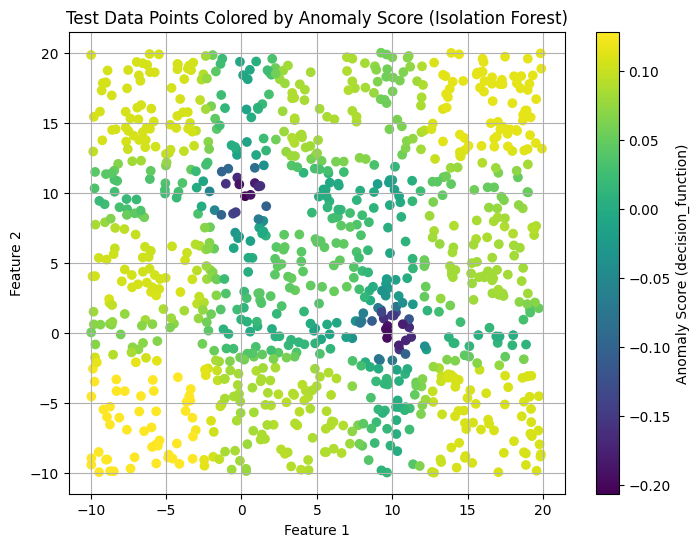

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_task2[:, 0], X_test_task2[:, 1], c=test_anomaly_scores_task2, cmap='viridis')
plt.colorbar(scatter, label='Anomaly Score (decision_function)')
plt.title('Test Data Points Colored by Anomaly Score (Isolation Forest)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [3]:
!pip install --upgrade pip
!pip install pyod
!pip install torch --index-url https://download.pytorch.org/whl/cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://download.pytorch.org/whl/cpu


In [5]:
from pyod.models.dif import DIF
from pyod.models.loda import LODA

In [14]:
dif_model = DIF(contamination=0.02)
dif_model.fit(X_task2)

test_anomaly_scores_dif = dif_model.decision_function(X_test_task2)

print("First 10 anomaly scores for Task 2 (test data - DIF):\n", test_anomaly_scores_dif[:10])
print("Shape of anomaly scores for Task 2 (test data - DIF):", test_anomaly_scores_dif.shape)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

First 10 anomaly scores for Task 2 (test data - DIF):
 [0.29004114 0.51849316 0.45957575 0.35315459 0.27655943 0.32235964
 0.31842388 0.39773154 0.3998636  0.29752434]
Shape of anomaly scores for Task 2 (test data - DIF): (1000,)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [15]:
loda_model = LODA(contamination=0.02, n_bins=20)
loda_model.fit(X_task2)

test_anomaly_scores_loda = loda_model.decision_function(X_test_task2)

print("First 10 anomaly scores for Task 2 (test data - LODA):\n", test_anomaly_scores_loda[:10])
print("Shape of anomaly scores for Task 2 (test data - LODA):", test_anomaly_scores_loda.shape)

First 10 anomaly scores for Task 2 (test data - LODA):
 [0.17720225 0.05282893 0.04622486 0.05282893 0.10870072 0.03516004
 0.03542443 0.03356318 0.039378   0.1108878 ]
Shape of anomaly scores for Task 2 (test data - LODA): (1000,)


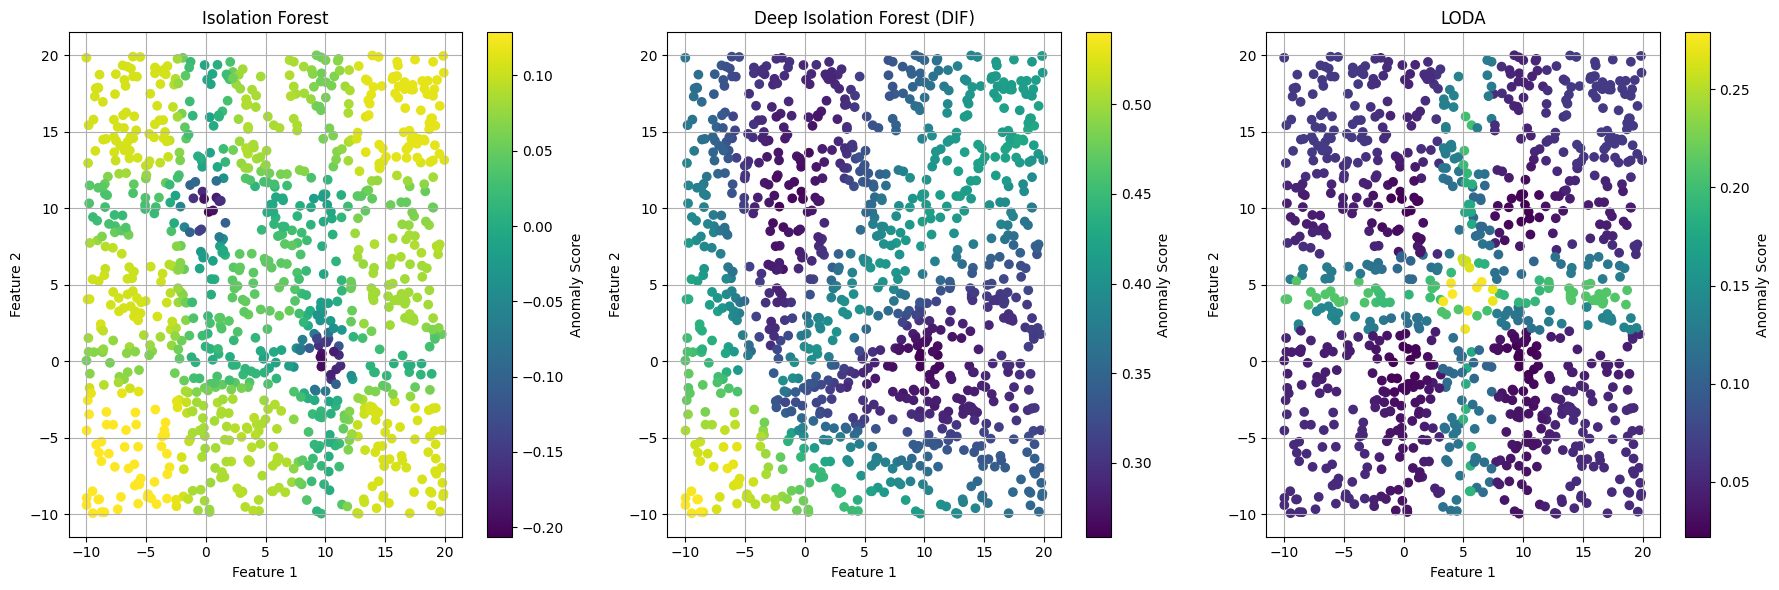

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
scatter_iforest = plt.scatter(X_test_task2[:, 0], X_test_task2[:, 1], c=test_anomaly_scores_task2, cmap='viridis')
plt.colorbar(scatter_iforest, label='Anomaly Score')
plt.title('Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.subplot(1, 3, 2)
scatter_dif = plt.scatter(X_test_task2[:, 0], X_test_task2[:, 1], c=test_anomaly_scores_dif, cmap='viridis')
plt.colorbar(scatter_dif, label='Anomaly Score')
plt.title('Deep Isolation Forest (DIF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.subplot(1, 3, 3)
scatter_loda = plt.scatter(X_test_task2[:, 0], X_test_task2[:, 1], c=test_anomaly_scores_loda, cmap='viridis')
plt.colorbar(scatter_loda, label='Anomaly Score')
plt.title('LODA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

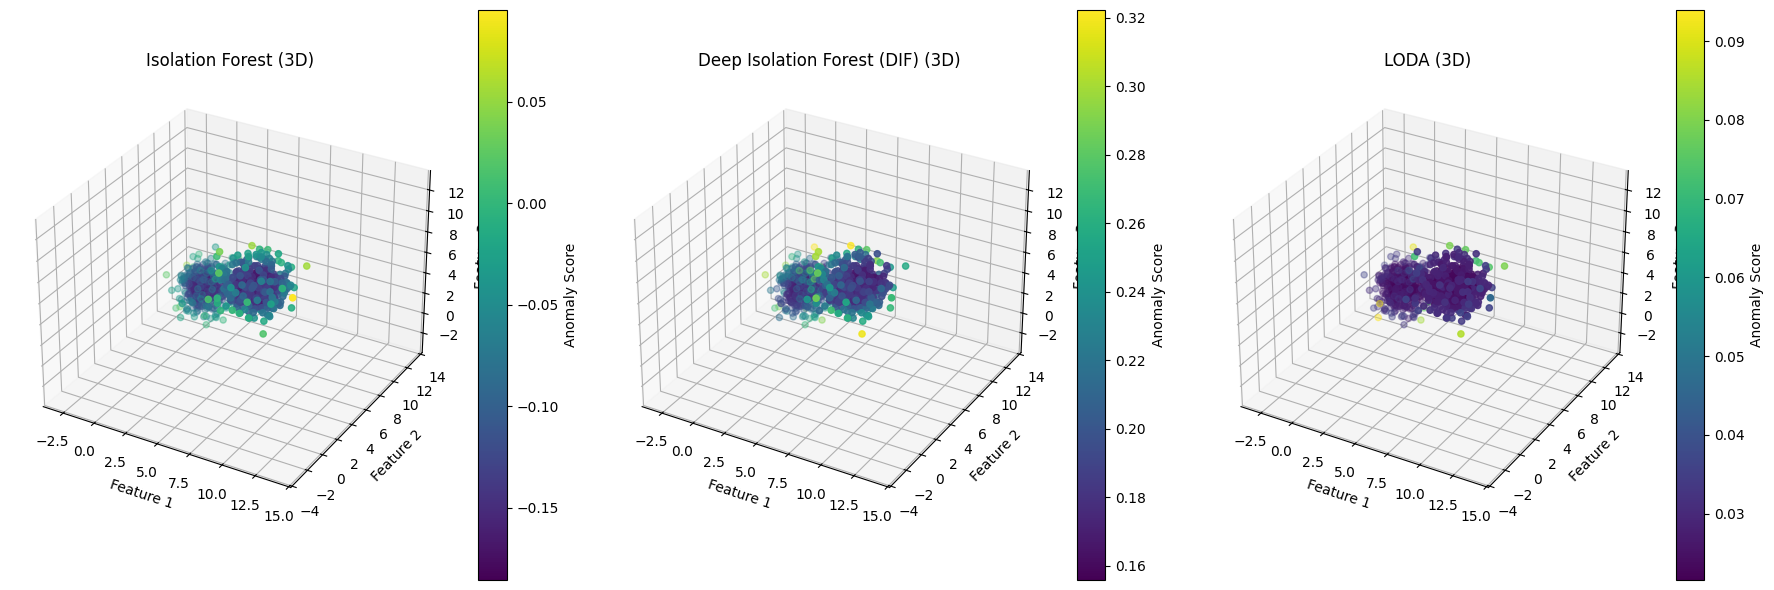

In [17]:
from sklearn.datasets import make_blobs
import numpy as np
from pyod.models.iforest import IForest
from pyod.models.dif import DIF
from pyod.models.loda import LODA
import matplotlib.pyplot as plt

X_task2_3d, _ = make_blobs(n_samples=1000, centers=[[0, 10, 0], [10, 0 , 10]], cluster_std=[1.0, 1.0], n_features=3, random_state=42)

iforest_model_3d = IForest(contamination=0.02, random_state=42)
iforest_model_3d.fit(X_task2_3d)
test_anomaly_scores_iforest_3d = iforest_model_3d.decision_function(X_task2_3d)

dif_model_3d = DIF(contamination=0.02)
dif_model_3d.fit(X_task2_3d)
test_anomaly_scores_dif_3d = dif_model_3d.decision_function(X_task2_3d)

loda_model_3d = LODA(contamination=0.02, n_bins=20)
loda_model_3d.fit(X_task2_3d)
test_anomaly_scores_loda_3d = loda_model_3d.decision_function(X_task2_3d)


fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
scatter_iforest_3d = ax1.scatter(X_task2_3d[:, 0], X_task2_3d[:, 1], X_task2_3d[:, 2], c=test_anomaly_scores_iforest_3d, cmap='viridis')
fig.colorbar(scatter_iforest_3d, ax=ax1, label='Anomaly Score')
ax1.set_title('Isolation Forest (3D)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')


ax2 = fig.add_subplot(132, projection='3d')
scatter_dif_3d = ax2.scatter(X_task2_3d[:, 0], X_task2_3d[:, 1], X_task2_3d[:, 2], c=test_anomaly_scores_dif_3d, cmap='viridis')
fig.colorbar(scatter_dif_3d, ax=ax2, label='Anomaly Score')
ax2.set_title('Deep Isolation Forest (DIF) (3D)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')

ax3 = fig.add_subplot(133, projection='3d')
scatter_loda_3d = ax3.scatter(X_task2_3d[:, 0], X_task2_3d[:, 1], X_task2_3d[:, 2], c=test_anomaly_scores_loda_3d, cmap='viridis')
fig.colorbar(scatter_loda_3d, ax=ax3, label='Anomaly Score')
ax3.set_title('LODA (3D)')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_zlabel('Feature 3')


plt.tight_layout()
plt.show()

**Task 3**

In [18]:
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mat = scipy.io.loadmat('/content/shuttle.mat')
X = mat['X']
y = mat['y'].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

print("Shape of original data:", X.shape)
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of testing labels:", y_test.shape)
print("\nFirst 5 rows of normalized training data:\n", X_train_normalized[:5])

Shape of original data: (49097, 9)
Shape of training data: (29458, 9)
Shape of testing data: (19639, 9)
Shape of training labels: (29458,)
Shape of testing labels: (19639,)

First 5 rows of normalized training data:
 [[0.19791667 0.48535741 0.60833333 0.34797412 0.375      0.63821206
  0.67567568 0.6618123  0.61168385]
 [0.10416667 0.48535741 0.64166667 0.34848485 0.34294872 0.63837911
  0.75675676 0.70064725 0.63230241]
 [0.29166667 0.48588223 0.475      0.34865509 0.38782051 0.6381166
  0.5        0.62297735 0.61512027]
 [0.27083333 0.48535741 0.475      0.34780388 0.38782051 0.6381166
  0.50675676 0.62297735 0.61168385]
 [0.22916667 0.48535741 0.4        0.34797412 0.38141026 0.63837911
  0.48648649 0.61650485 0.61168385]]


In [19]:
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pyod.models.iforest import IForest
from pyod.models.dif import DIF
from pyod.models.loda import LODA
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
import numpy as np

mat = scipy.io.loadmat('/content/shuttle.mat')
X = mat['X']
y = mat['y'].ravel()

n_splits = 10

iforest_ba_scores = []
iforest_roc_auc_scores = []
dif_ba_scores = []
dif_roc_auc_scores = []
loda_ba_scores = []
loda_roc_auc_scores = []

for i in range(n_splits):
    print(f"Processing split {i+1}/{n_splits}...")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)

    scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    iforest_model = IForest(contamination=0.02, random_state=42)
    iforest_model.fit(X_train_normalized)
    y_pred_iforest = iforest_model.predict(X_test_normalized)
    y_scores_iforest = iforest_model.decision_function(X_test_normalized)

    iforest_ba = balanced_accuracy_score(y_test, y_pred_iforest)
    iforest_roc_auc = roc_auc_score(y_test, y_scores_iforest)

    iforest_ba_scores.append(iforest_ba)
    iforest_roc_auc_scores.append(iforest_roc_auc)

    dif_model = DIF(contamination=0.02)
    dif_model.fit(X_train_normalized)
    y_pred_dif = dif_model.predict(X_test_normalized)
    y_scores_dif = dif_model.decision_function(X_test_normalized)

    dif_ba = balanced_accuracy_score(y_test, y_pred_dif)
    dif_roc_auc = roc_auc_score(y_test, y_scores_dif)

    dif_ba_scores.append(dif_ba)
    dif_roc_auc_scores.append(dif_roc_auc)

    loda_model = LODA(contamination=0.02, n_bins=20)
    loda_model.fit(X_train_normalized)
    y_pred_loda = loda_model.predict(X_test_normalized)
    y_scores_loda = loda_model.decision_function(X_test_normalized)


    loda_ba = balanced_accuracy_score(y_test, y_pred_loda)
    loda_roc_auc = roc_auc_score(y_test, y_scores_loda)

    loda_ba_scores.append(loda_ba)
    loda_roc_auc_scores.append(loda_roc_auc)


mean_iforest_ba = np.mean(iforest_ba_scores)
mean_iforest_roc_auc = np.mean(iforest_roc_auc_scores)
mean_dif_ba = np.mean(dif_ba_scores)
mean_dif_roc_auc = np.mean(dif_roc_auc_scores)
mean_loda_ba = np.mean(loda_ba_scores)
mean_loda_roc_auc = np.mean(loda_roc_auc_scores)


print("\nMean Scores over 10 Splits:")
print(f"Isolation Forest - Balanced Accuracy: {mean_iforest_ba:.4f}, ROC AUC: {mean_iforest_roc_auc:.4f}")
print(f"Deep Isolation Forest (DIF) - Balanced Accuracy: {mean_dif_ba:.4f}, ROC AUC: {mean_dif_roc_auc:.4f}")
print(f"LODA - Balanced Accuracy: {mean_loda_ba:.4f}, ROC AUC: {mean_loda_roc_auc:.4f}")

Processing split 1/10...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

Processing split 2/10...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

Processing split 3/10...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

Processing split 4/10...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

Processing split 5/10...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

Processing split 6/10...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

Processing split 7/10...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

Processing split 8/10...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

Processing split 9/10...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

Processing split 10/10...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i


Mean Scores over 10 Splits:
Isolation Forest - Balanced Accuracy: 0.6358, ROC AUC: 0.9970
Deep Isolation Forest (DIF) - Balanced Accuracy: 0.5645, ROC AUC: 0.9645
LODA - Balanced Accuracy: 0.6198, ROC AUC: 0.9054
